In [23]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
# from sklearn import MinMaxScaler

ImportError: cannot import name 'MinMaxScaler' from 'sklearn' (/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/__init__.py)

In [9]:
df = pd.read_csv("income.csv")

In [10]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


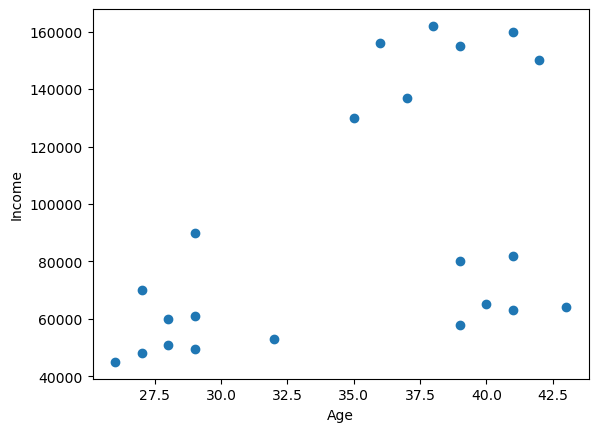

In [11]:
plt.scatter(df.Age, df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[["Age", "Income($)"]])

/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [14]:
predicted=kmeans.predict(df[["Age", "Income($)"]])

In [15]:
predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [16]:
df["clusters"] = predicted
df

,Name,Age,Income($),clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [17]:
kmeans.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

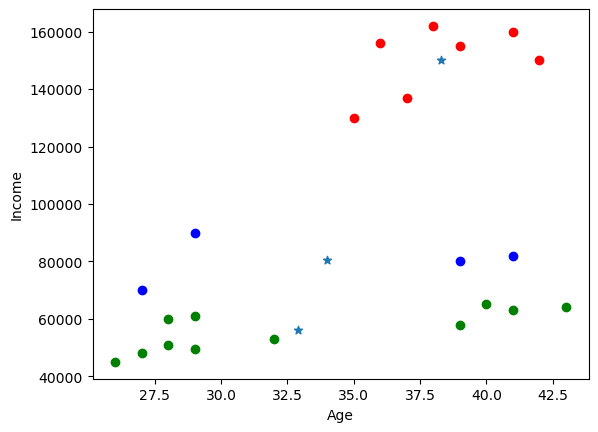

In [20]:
c1=df[df.clusters==0]
c2=df[df.clusters==1]
c3=df[df.clusters==2]
plt.scatter(c1.Age, c1["Income($)"], color="blue")
plt.scatter(c2.Age, c2["Income($)"], color="red")
plt.scatter(c3.Age, c3["Income($)"], color="green")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="*")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

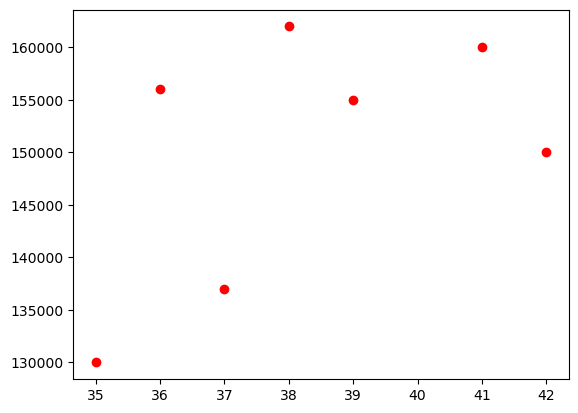

In [19]:
plt.scatter(c2.Age, c2["Income($)"], color="red")

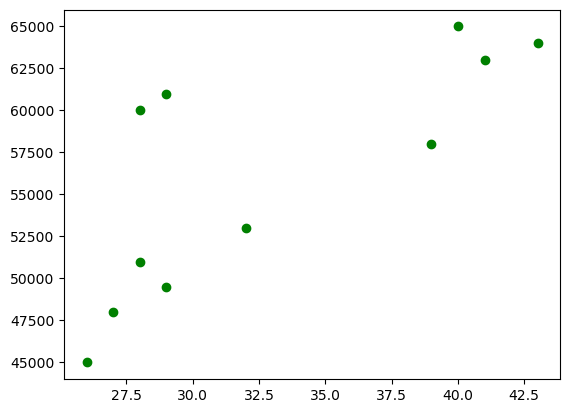

In [24]:
plt.scatter(c3.Age, c3["Income($)"], color="green")

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
minmax=MinMaxScaler()

In [27]:
transformed= minmax.fit_transform(df[["Age", "Income($)"]])

In [28]:
df.Age = transformed[:,0]

In [29]:
df["Income($)"] = transformed[:,1]

In [30]:
df

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[["Age", "Income($)"]])

/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [32]:
predicted2=kmeans.predict(df[["Age", "Income($)"]])

In [33]:
predicted2

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [34]:
df["clusters"] = predicted2

In [35]:
kmeans.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

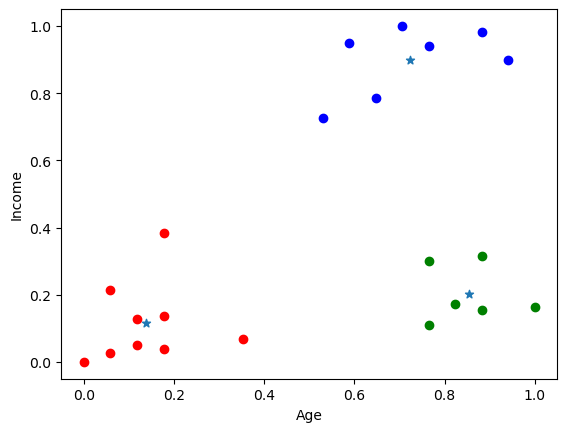

In [36]:
c1=df[df.clusters==0]
c2=df[df.clusters==1]
c3=df[df.clusters==2]
plt.scatter(c1.Age, c1["Income($)"], color="blue")
plt.scatter(c2.Age, c2["Income($)"], color="red")
plt.scatter(c3.Age, c3["Income($)"], color="green")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="*")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [37]:
#Elbow plot -> wcss vs no. of cluster

In [38]:
inertias=[]

In [39]:
kmeans.inertia_ #no of cluster 3

0.4750783498553096

In [41]:
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df[["Age", "Income($)"]])
    inertias.append(km.inertia_)
inertias

/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.27558255687229766,
 0.21878010893330452,
 0.1685851223602976,
 0.13781880133764024,
 0.10188787724979426,
 0.08272341876466036]

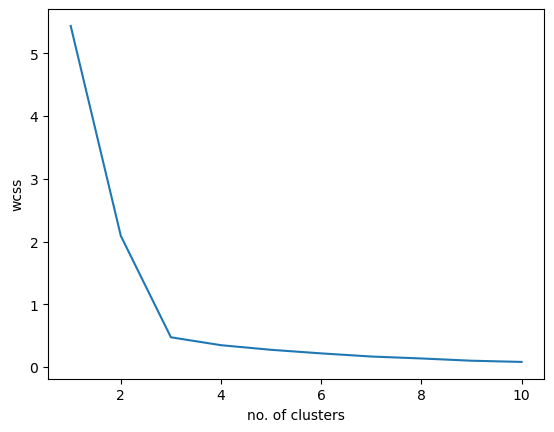

In [42]:
plt.plot(range(1,11), inertias)
plt.xlabel("no. of clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


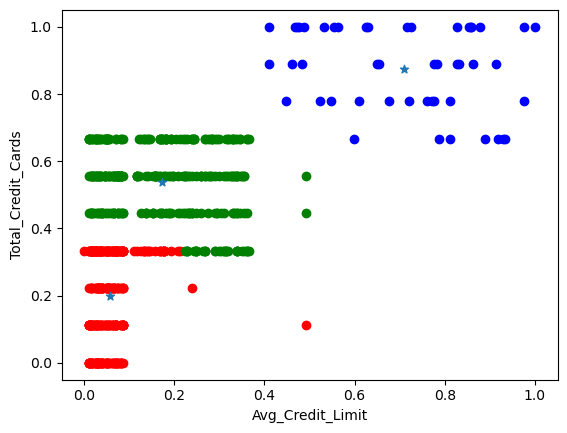

In [15]:
# Write a Python program that reads the Credit Card Customer Data.csv.The  following  are  the  tasks  that  need  to  be consideredwhile constructing  the  solution  to  Segregate  customers  based  on  the  data  provided with the help of k-means clustering.
 
# 1.Load the Given CSV file into a DataFrame
 
# 2.Find missing values(impute) and drop the unnecessary columns
 
# 3.Univariate and bivariate analysis (EDA) (convey some relevant info about the data) (mention the info/ insights)
 
# 4.Standardize the whole dataset (scaling )
 
# 5.Find the within-cluster sum of square   (WCSS)
 
# 6.Use  a  line  plot  using  matplotlib  to  find  scores  for  different  sizes  of  K  and choose the best size for the cluster and build the final model  (elbow plot)
 
# 8.Observe Cluster behavior with different columns. (K means)
 
# 9.Print Co-ordinates of all centroids

from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# minmax=MinMaxScaler()

df=pd.read_csv("Credit-Card-Customer-Data.csv")
df.head()

minmax=MinMaxScaler()
transformed= minmax.fit_transform(df[["Avg_Credit_Limit", "Total_Credit_Cards"]])
transformed
df["Avg_Credit_Limit"] = transformed[:,0]
df["Total_Credit_Cards"] = transformed[:,1]
df

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[["Avg_Credit_Limit", "Total_Credit_Cards"]])

predicted=kmeans.predict(df[["Avg_Credit_Limit", "Total_Credit_Cards"]])
predicted

df["clusters"] = predicted
df

kmeans.cluster_centers_

c1=df[df.clusters==0]
c2=df[df.clusters==1]
c3=df[df.clusters==2]
plt.scatter(c1["Avg_Credit_Limit"], c1["Total_Credit_Cards"], color="blue")
plt.scatter(c2["Avg_Credit_Limit"], c2["Total_Credit_Cards"], color="red")
plt.scatter(c3["Avg_Credit_Limit"], c3["Total_Credit_Cards"], color="green")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="*")
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_Credit_Cards")
plt.show()
# plt.scatter(df["Avg_Credit_Limit"], df["Total_Credit_Cards"])
# plt.xlabel("Avg_Credit_Limit")
# plt.ylabel("Total_Credit_Cards")
# plt.show()

/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

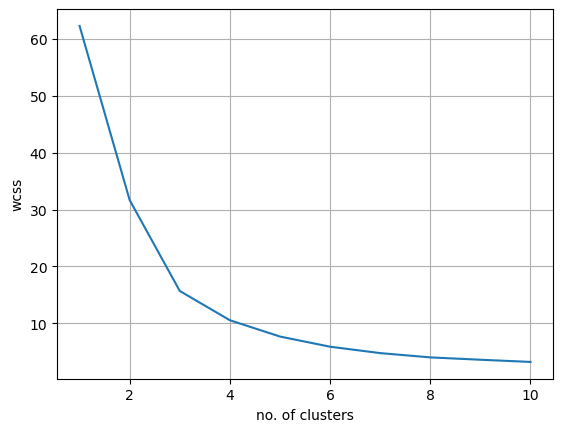

In [19]:
inertias=[]
kmeans.inertia_ #no of cluster 3

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df[["Avg_Credit_Limit", "Total_Credit_Cards"]])
    inertias.append(km.inertia_)
inertias

plt.plot(range(1,11), inertias)
plt.xlabel("no. of clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

In [20]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters
0,1,87073,0.492386,0.111111,1,1,0,1
1,2,38414,0.238579,0.222222,0,10,9,1
2,3,17341,0.238579,0.666667,1,3,4,2
3,4,40496,0.137056,0.444444,1,1,4,2
4,5,47437,0.492386,0.555556,0,12,3,2
...,...,...,...,...,...,...,...,...
655,656,51108,0.487310,1.000000,1,10,0,0
656,657,60732,0.411168,1.000000,1,13,2,0
657,658,53834,0.720812,0.777778,1,9,1,0
658,659,80655,0.857868,1.000000,1,15,0,0


In [21]:
from apyori import ariori

ModuleNotFoundError: No module named 'apyori'

In [22]:
conda install apyori

Retrieving notices: ...working... done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - apyori

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done